In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
#set pandas display options to show all columns
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.head().transpose()

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


In [8]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


Describe is called 5 point summary

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
#to include columns that does not have int or float datatypes(to include object datatype)
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


OR

In [11]:
df.describe(exclude=np.number)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


MISSING VALUE TREATEMENT

In [12]:
#sum gives total number of  missing values

missing_value=df.isnull().sum()
missing_value

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
missing_value=df.isnull().sum()

#check for missing values
total=df.isnull().sum().sort_values(ascending=False)

#calculate the percentage of missing values
percent=((df.isnull().sum()/df.shape[0])*100)

#sorting values in descending order
percent=percent.sort_values(ascending=False)

#concat the total missing_value and percentage of missing values
missing_data=pd.concat([total, percent],axis=1,keys=["Total","Percent"])

#add the data types
missing_data['Type']=df[missing_data.index].dtypes

missing_data

,Total,Percent,Type
price,0,0.0,int64
area,0,0.0,int64
bedrooms,0,0.0,int64
bathrooms,0,0.0,int64
stories,0,0.0,int64
mainroad,0,0.0,object
guestroom,0,0.0,object
basement,0,0.0,object
hotwaterheating,0,0.0,object
airconditioning,0,0.0,object


In [14]:
#get only numerical data from the data
df_num=df.select_dtypes(include=np.number)
df_num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [15]:
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

<Axes: >

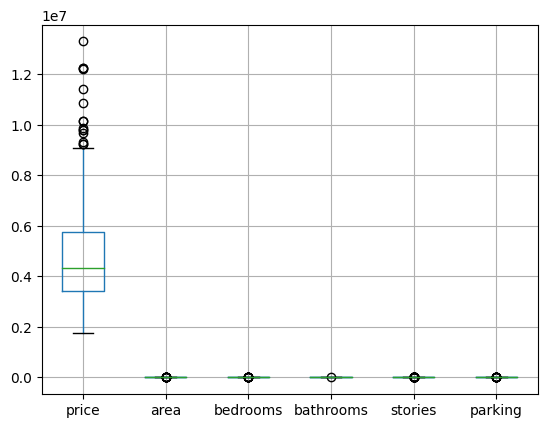

In [16]:
df_num.boxplot()

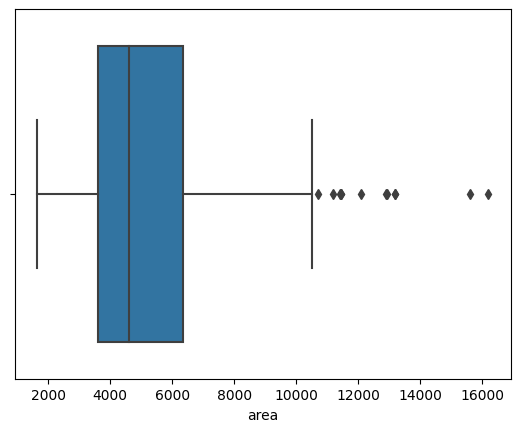

In [17]:
sns.boxplot(x=df_num.area)
plt.show()

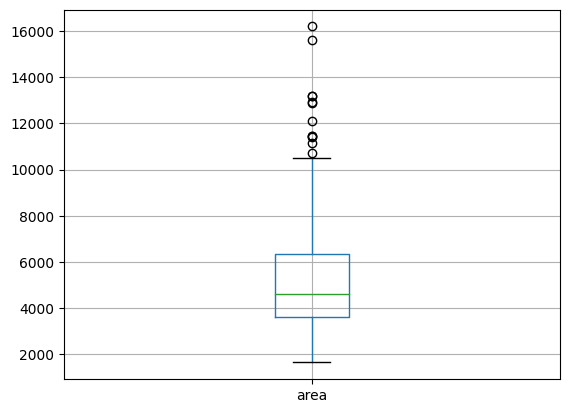

In [18]:
#for ploting only one column
df_num.boxplot(column='area',rot=0)
plt.show()

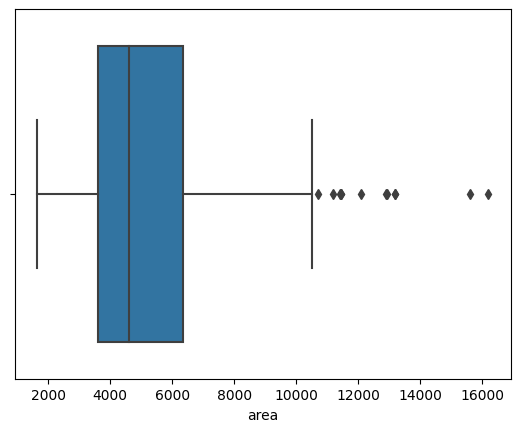

In [19]:
#ploting using seaborn to rotate the graph horizontally
sns.boxplot(x=df_num.area)
plt.show()

In [20]:
#get only categorical data from the data
df_cat=df.select_dtypes(exclude=np.number)
df_cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [21]:
df_cat.columns


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

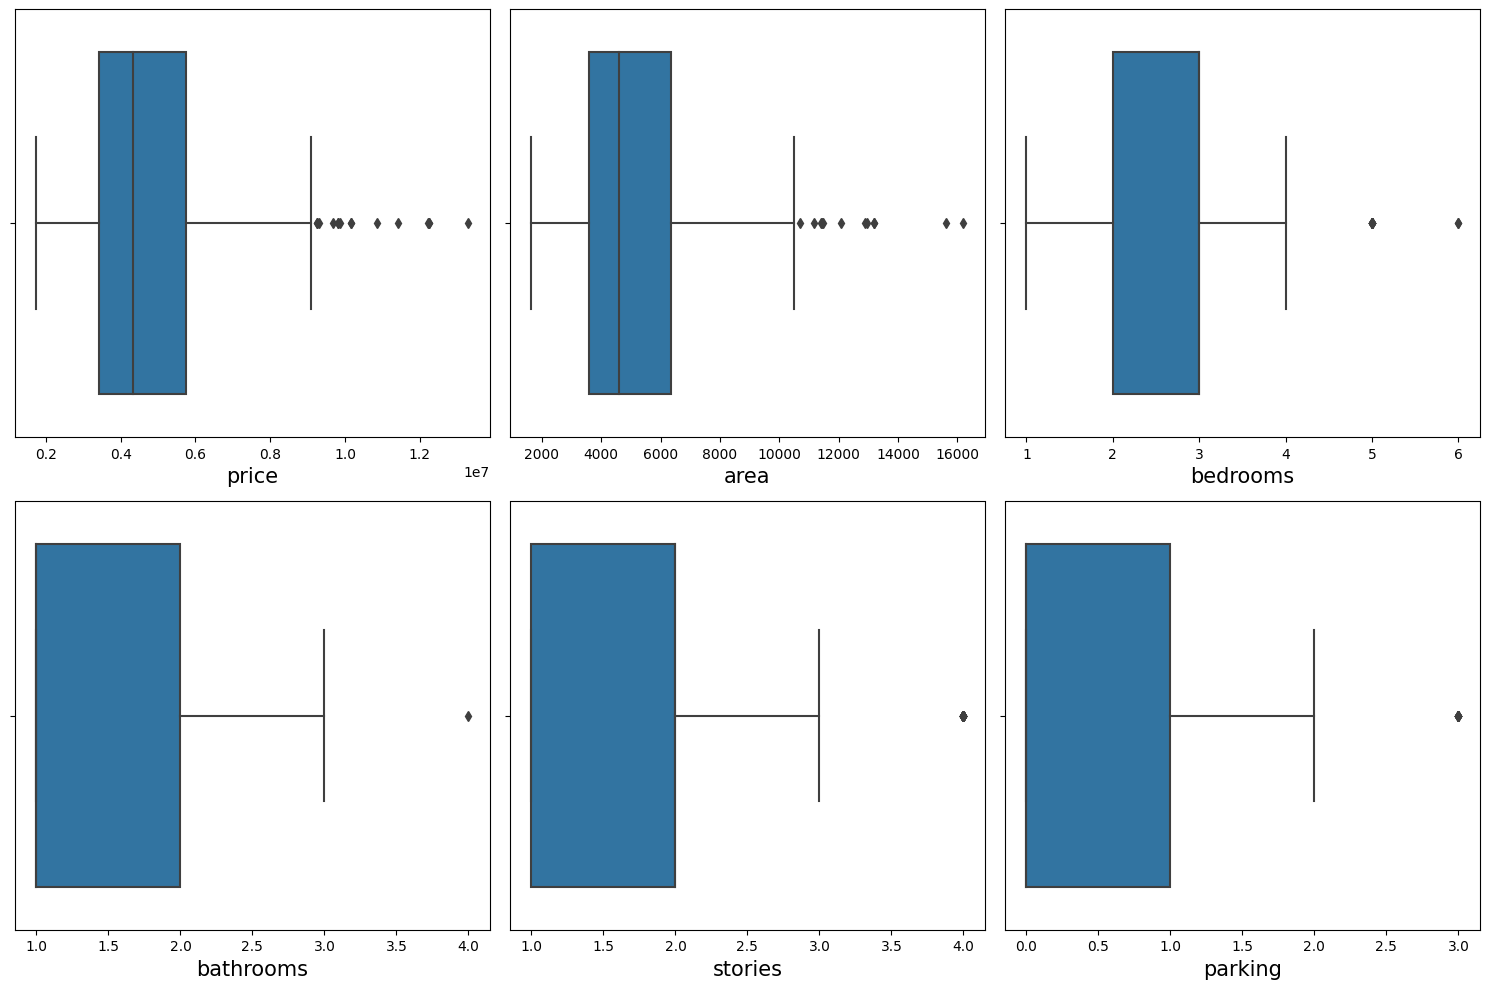

In [22]:
df_num = df.select_dtypes(include=['int64'])

#create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

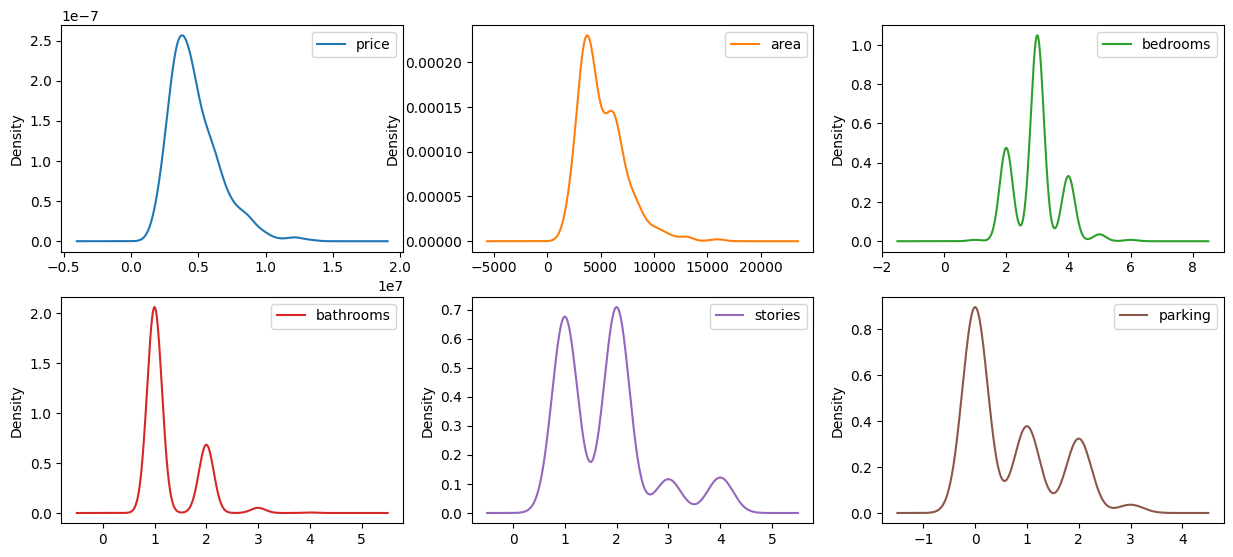

In [23]:
#DENSITY graph
plt.rcParams["figure.figsize"]=[15,10]

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

plt.show()

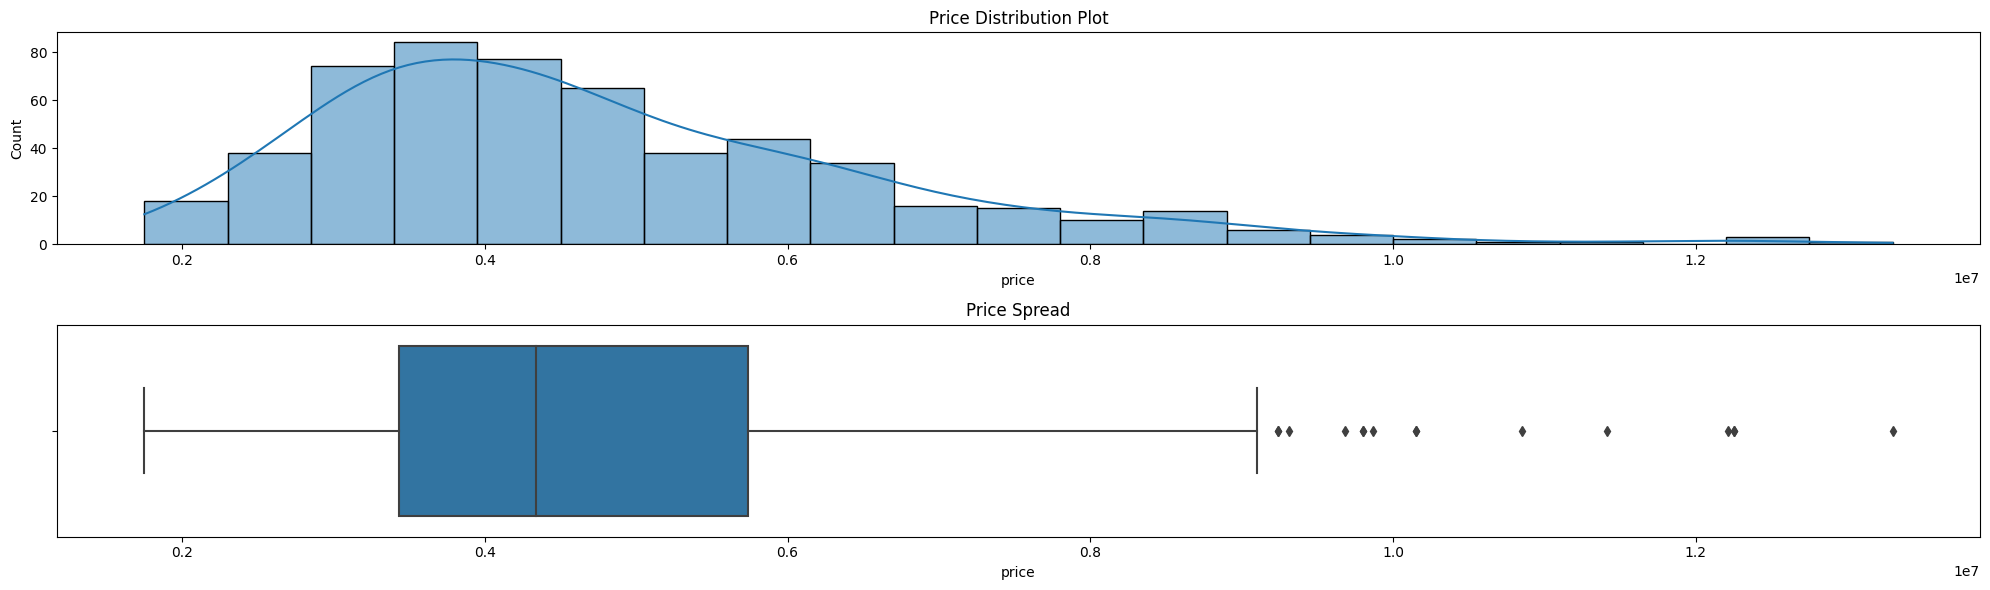

In [24]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1) #create 2 rows, 1 column and select the first subplot
plt.title('Price Distribution Plot')
sns.histplot(df.price, kde=True)

plt.subplot(2,1,2)#create 2 rows, 1 column and select the 2nd subplot
plt.title('Price Spread')
sns.boxplot(x=df.price, orient="h")


plt.tight_layout()#adjust spacing between subplots
plt.show()

#if mean<median  ==> right skewed data                                                                                                          
#mean>median  ==> left skewed data

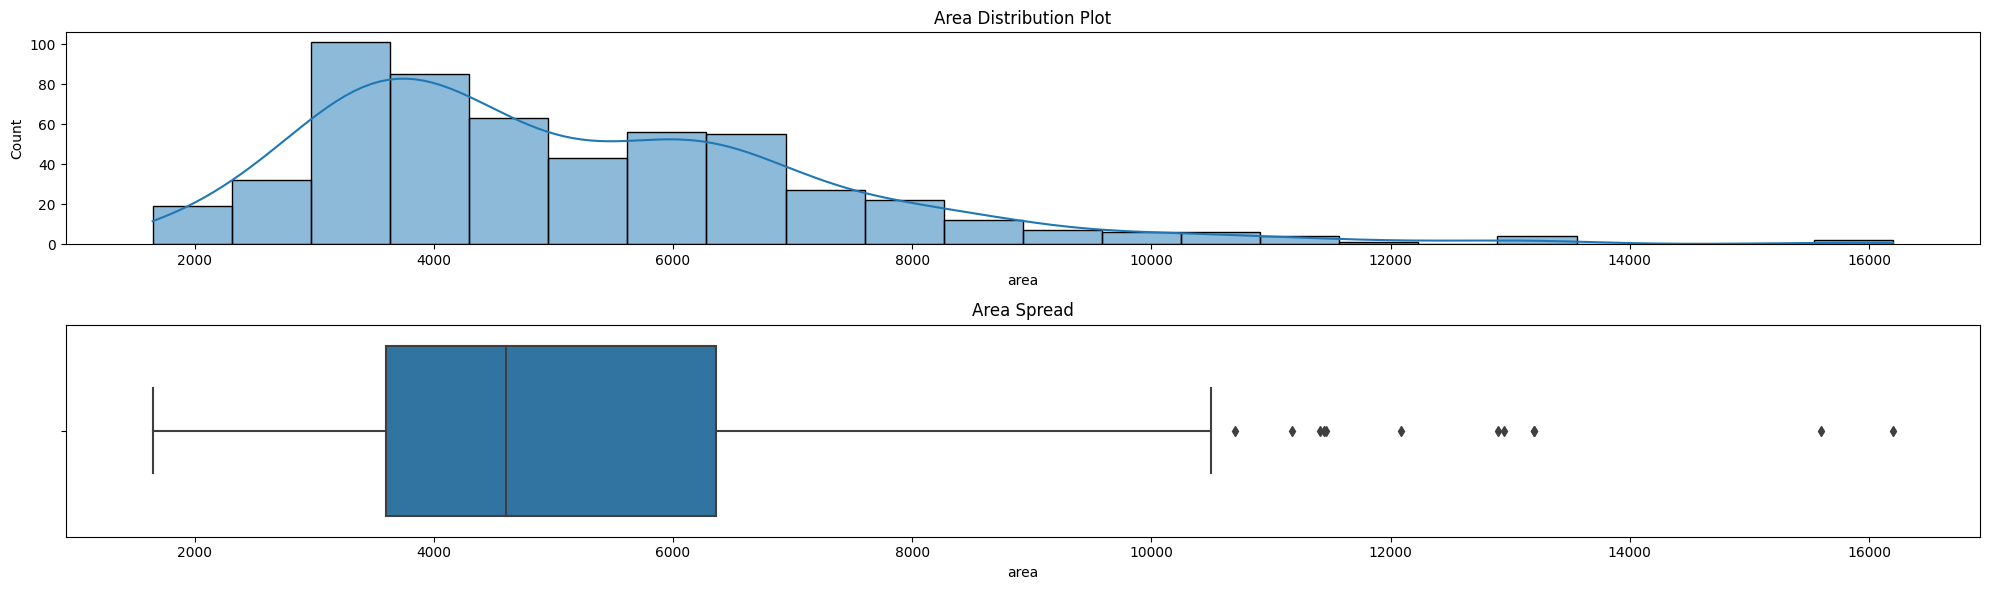

In [25]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1) #create 2 rows, 1 column and select the first subplot
plt.title('Area Distribution Plot')
sns.histplot(df.area, kde=True)

plt.subplot(2,1,2)#create 2 rows, 1 column and select the 2nd subplot
plt.title('Area Spread')
sns.boxplot(x=df.area, orient="h")


plt.tight_layout()#adjust spacing between subplots
plt.show()

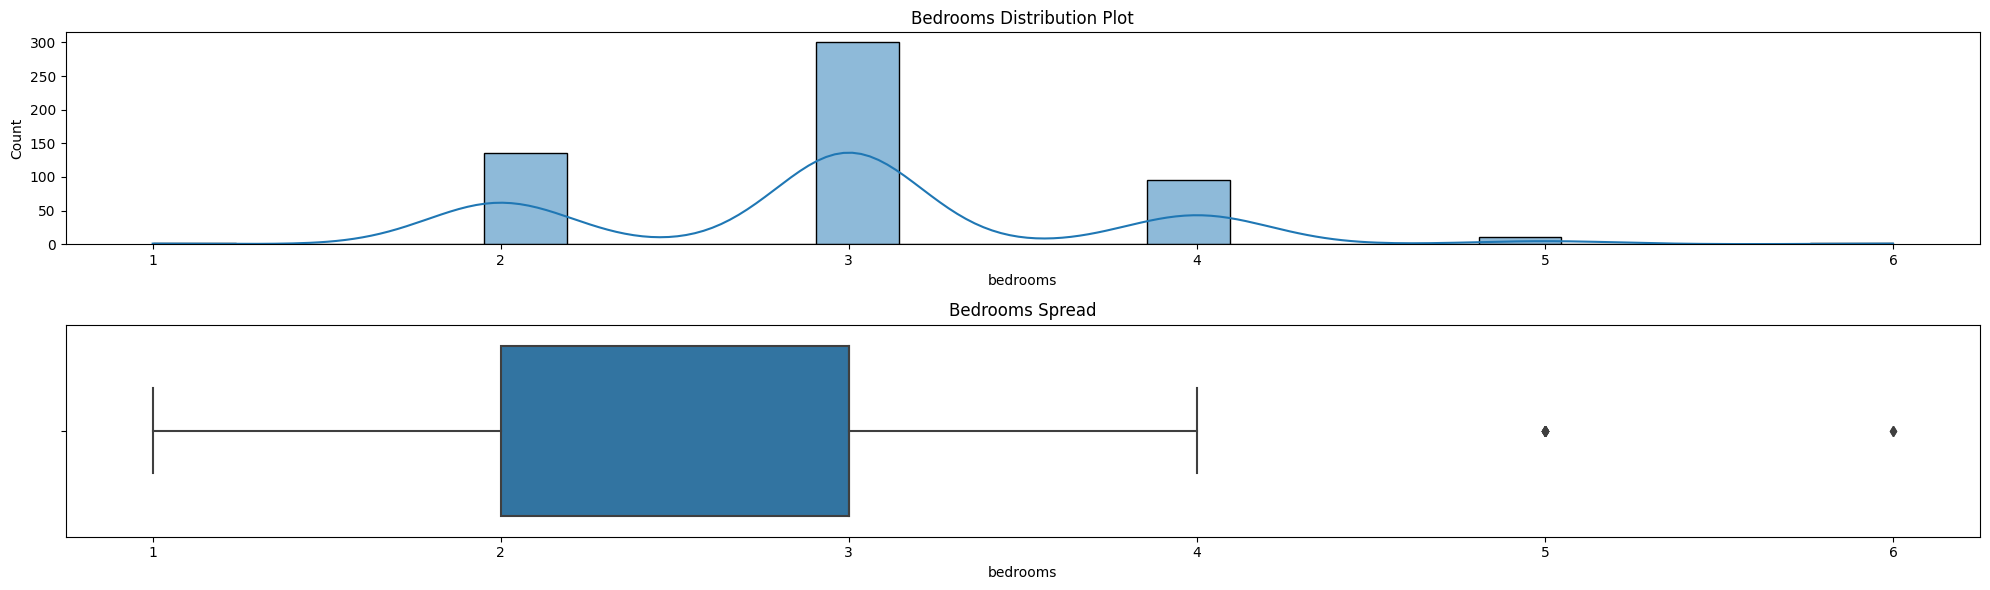

In [26]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1) #create 2 rows, 1 column and select the first subplot
plt.title('Bedrooms Distribution Plot')
sns.histplot(df.bedrooms, kde=True)

plt.subplot(2,1,2)#create 2 rows, 1 column and select the 2nd subplot
plt.title('Bedrooms Spread')
sns.boxplot(x=df.bedrooms, orient="h")


plt.tight_layout()#adjust spacing between subplots
plt.show()

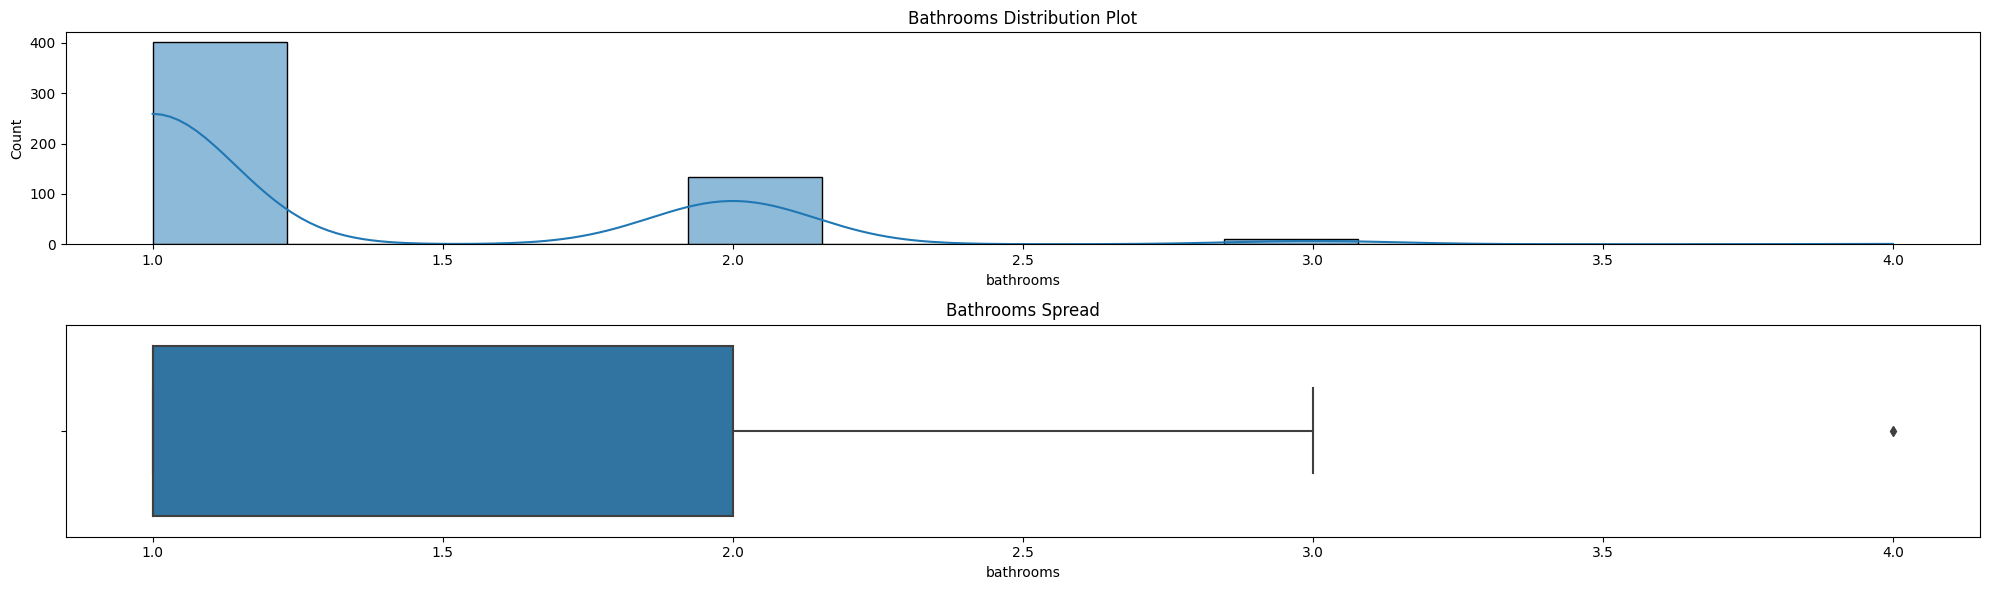

In [27]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1) #create 2 rows, 1 column and select the first subplot
plt.title('Bathrooms Distribution Plot')
sns.histplot(df.bathrooms, kde=True)

plt.subplot(2,1,2)#create 2 rows, 1 column and select the 2nd subplot
plt.title('Bathrooms Spread')
sns.boxplot(x=df.bathrooms, orient="h")


plt.tight_layout()#adjust spacing between subplots
plt.show()

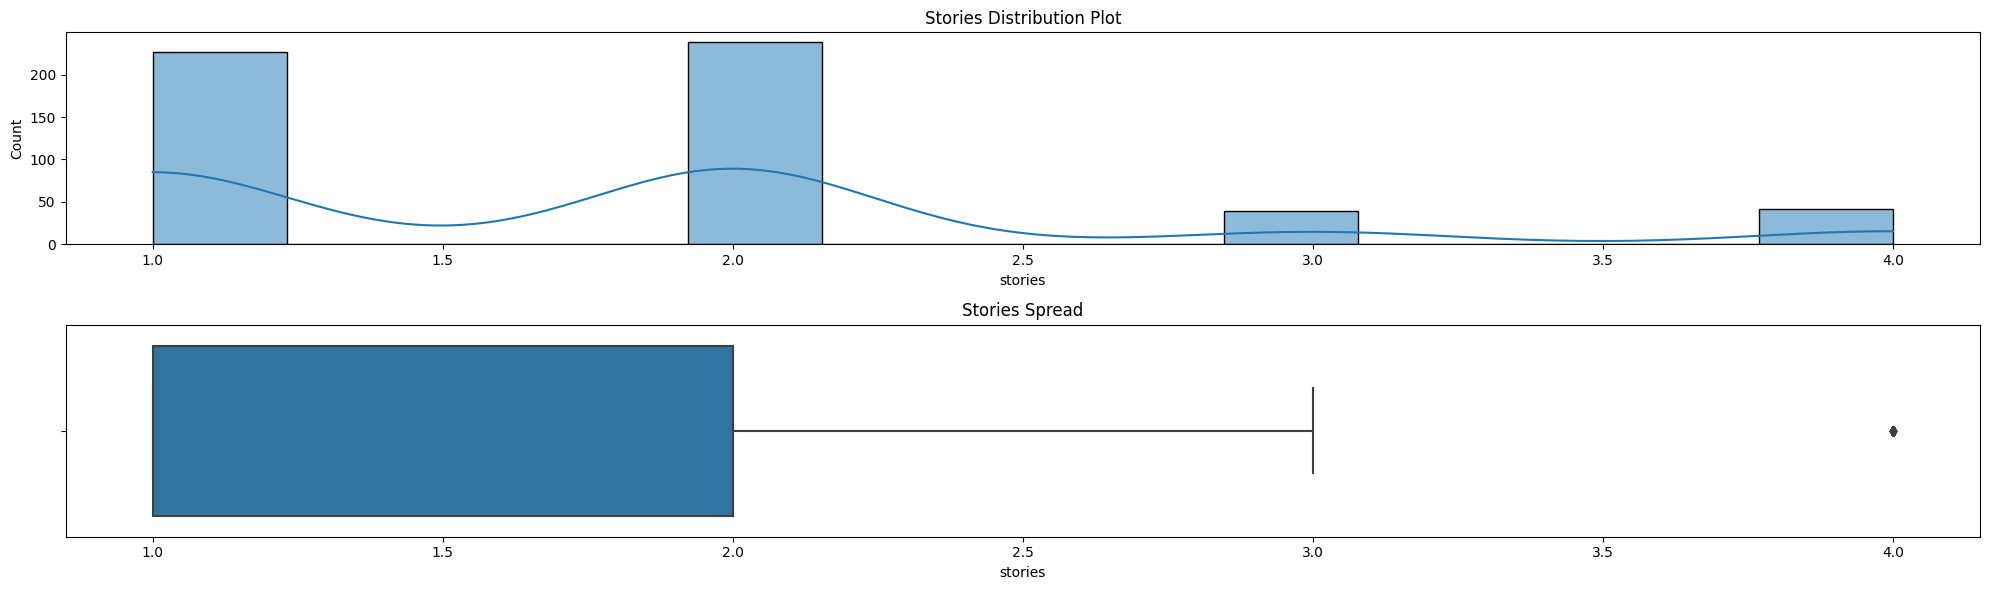

In [28]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1) #create 2 rows, 1 column and select the first subplot
plt.title('Stories Distribution Plot')
sns.histplot(df.stories, kde=True)

plt.subplot(2,1,2)#create 2 rows, 1 column and select the 2nd subplot
plt.title('Stories Spread')
sns.boxplot(x=df.stories, orient="h")


plt.tight_layout()#adjust spacing between subplots
plt.show()

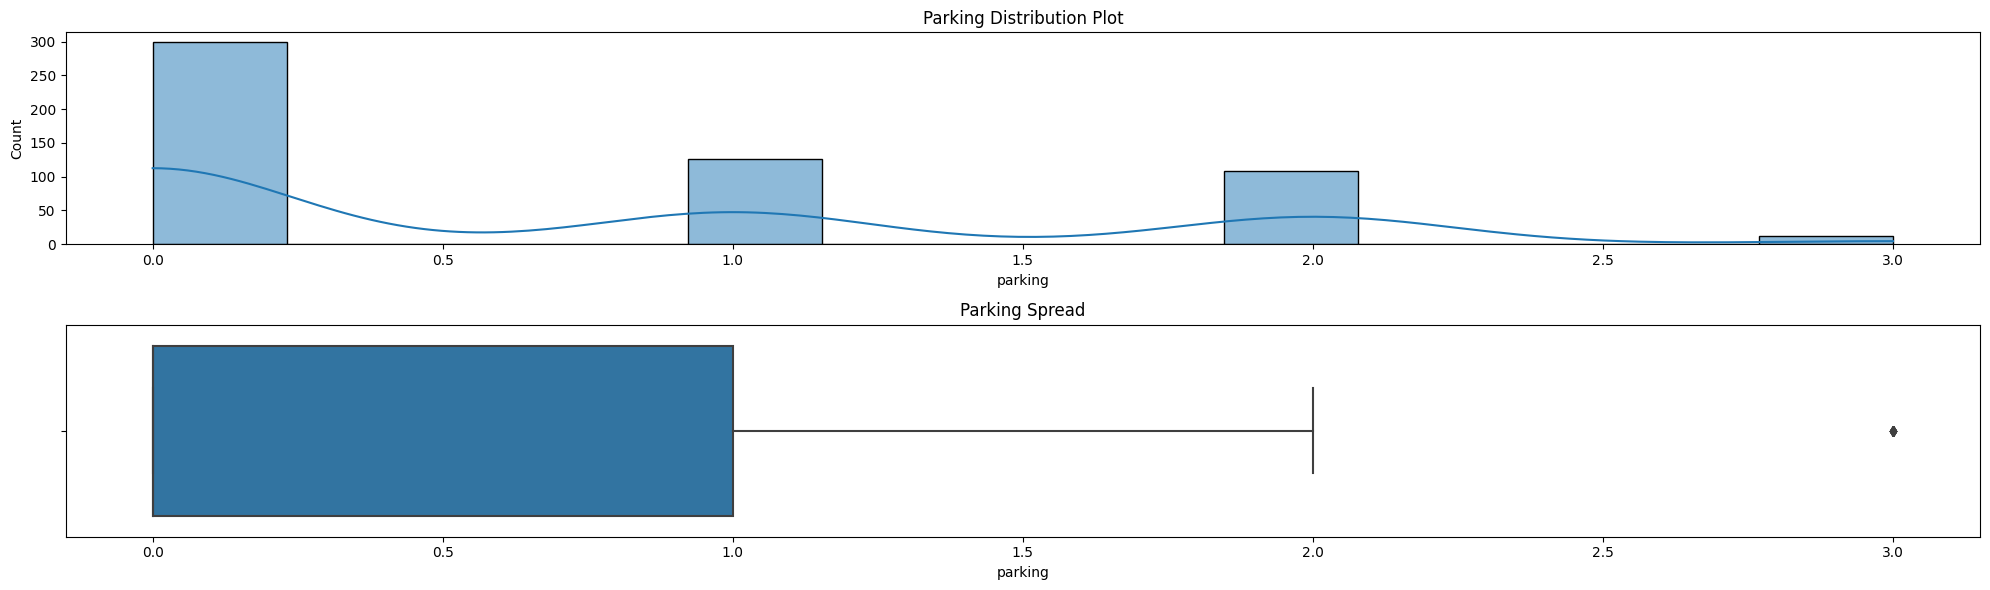

In [29]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1) #create 2 rows, 1 column and select the first subplot
plt.title('Parking Distribution Plot')
sns.histplot(df.parking, kde=True)

plt.subplot(2,1,2)#create 2 rows, 1 column and select the 2nd subplot
plt.title('Parking Spread')
sns.boxplot(x=df.parking, orient="h")


plt.tight_layout()#adjust spacing between subplots
plt.show()

In [30]:
df_num.price.mean(),df_num.price.median(),df_num.price.mode()

(4766729.247706422,
 4340000.0,
 0    3500000
 1    4200000
 Name: price, dtype: int64)

In [31]:
df_num.skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

Bivariate analysis

SKEWNESS

Accepted skew value= -0.5 to 0.5 

if data :
    
    
    left skew=apply either square/cube
    
    right skew= apply 1/x,square,logx,root(x)
    

In [32]:
skew=df.skew(numeric_only=True)
print(skew)

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64


POWER TRANSFORMER

In [33]:
#library helps to transform data into normal form/distribution
from sklearn.preprocessing import PowerTransformer
power_transformer=PowerTransformer()
pt=power_transformer.fit_transform(df[['price','area','bedrooms','bathrooms','stories','parking']])
pt


array([[ 2.77097674,  1.11545673,  1.35413392,  1.66118585,  1.33057611,
         1.34730508],
       [ 2.57875644,  1.55960141,  1.35413392,  1.76728263,  1.81464089,
         1.61415896],
       [ 2.57875644,  1.80429146,  0.12330349,  1.66118585,  0.52147758,
         1.34730508],
       ...,
       [-2.64987025, -0.67255906, -1.39272943, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -1.24861134,  0.12330349, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -0.51281107,  0.12330349, -0.59919871,  0.52147758,
        -0.88952552]])

POWER TRANSFORMED VALUES

In [34]:
#converting the 2D array pt into a dataframe df_pt with column names of df_num
df_pt=pd.DataFrame(data=pt,columns=df_num.columns)
df_pt.head()

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305


In [35]:
df_num.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


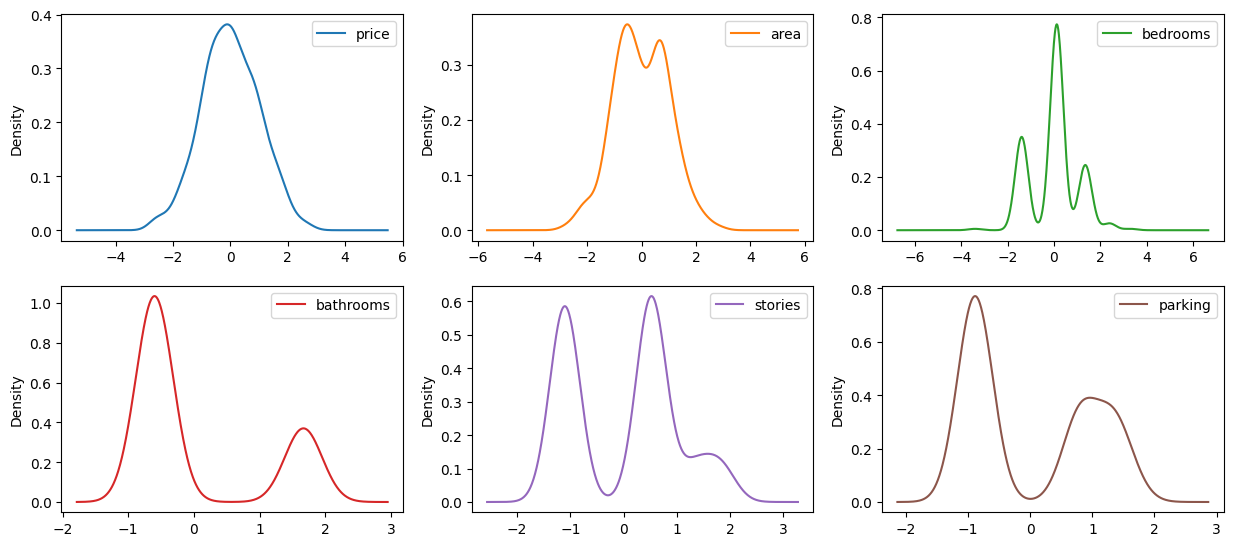

In [36]:
df_pt.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

In [37]:
df_pt.skew()

price        0.002774
area         0.004175
bedrooms     0.000540
bathrooms    1.073066
stories      0.121281
parking      0.311355
dtype: float64

In [38]:
mean_values,std_values=df_pt.mean(axis=0),df_pt.std(axis=0)
print("Mean values are:",mean_values)
print("Std deviation values are:",std_values)

Mean values are: price        1.183803e-14
area         3.494045e-15
bedrooms     6.257991e-16
bathrooms   -7.882461e-14
stories      1.825247e-16
parking      0.000000e+00
dtype: float64
Std deviation values are: price        1.000919
area         1.000919
bedrooms     1.000919
bathrooms    1.000919
stories      1.000919
parking      1.000919
dtype: float64


KURTOSIS

plotting

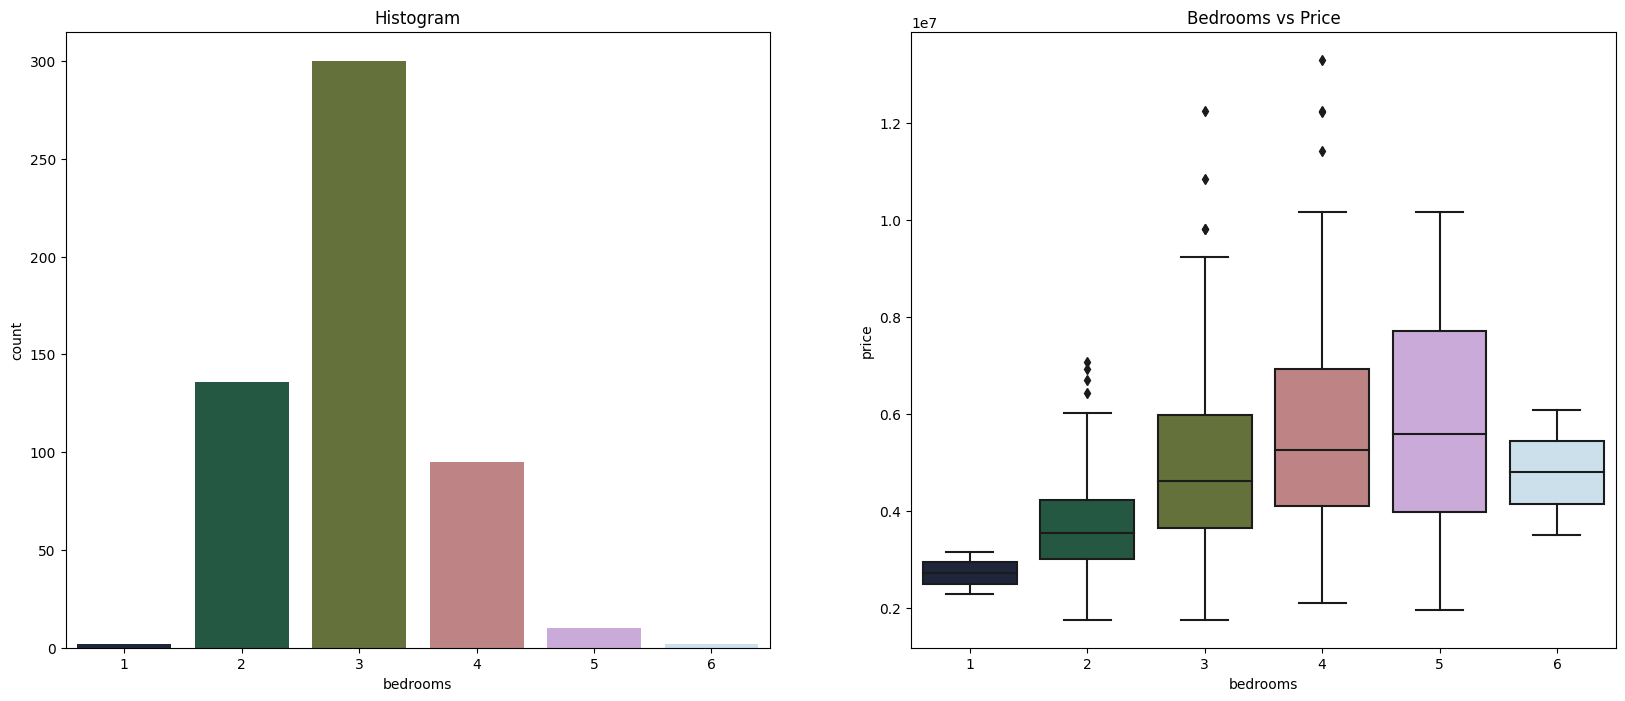

In [39]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='bedrooms', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title("Bedrooms vs Price")
sns.boxplot(data=df, x='bedrooms', y='price', palette=("cubehelix"))

plt.show()


In [40]:
df_num.bedrooms.value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [41]:
df_num.area.value_counts()

area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64

In [42]:
df_num.bathrooms.value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [43]:
df_num.parking.value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [44]:
df_num.stories.value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

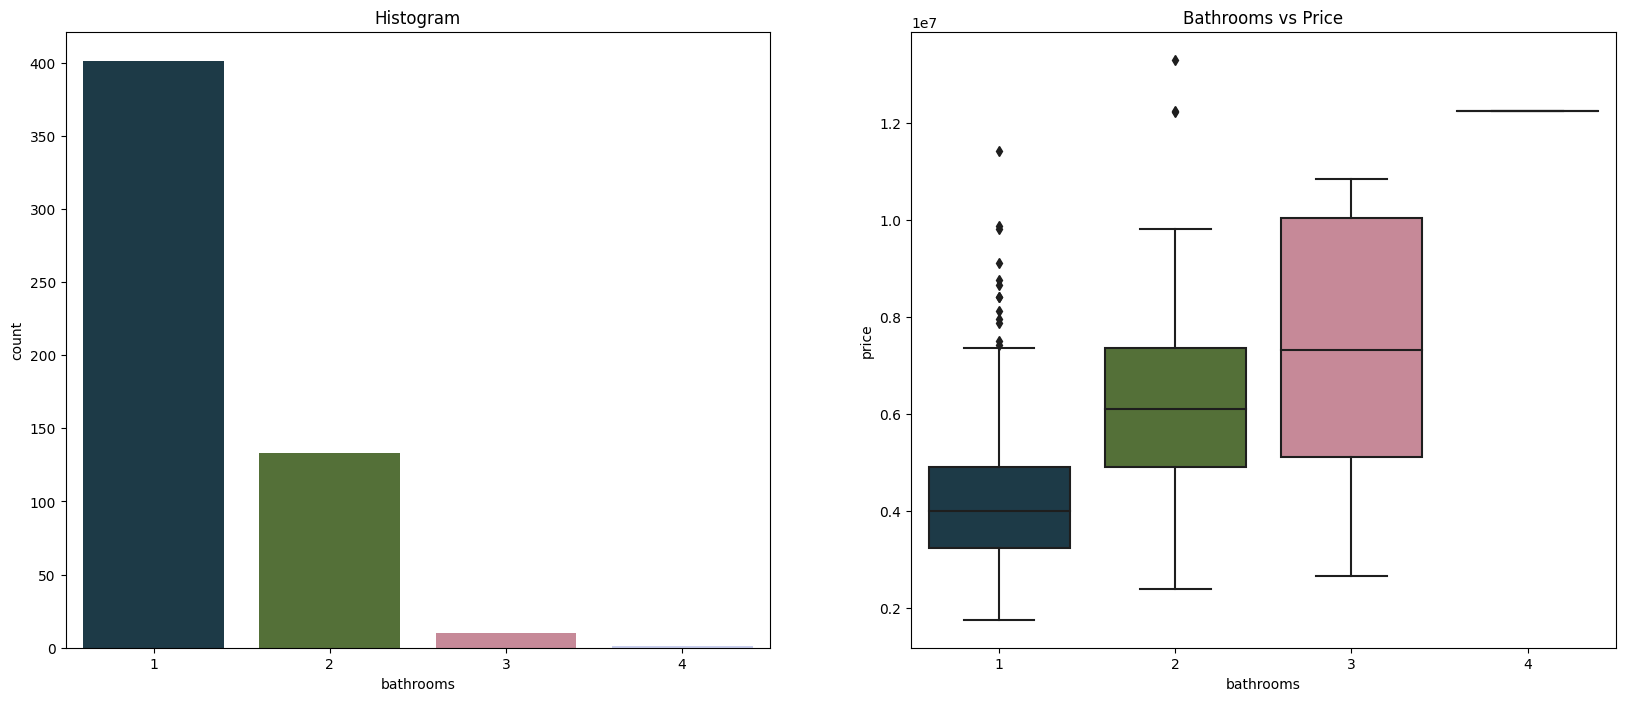

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='bathrooms', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title("Bathrooms vs Price")
sns.boxplot(data=df, x='bathrooms', y='price', palette=("cubehelix"))

plt.show()

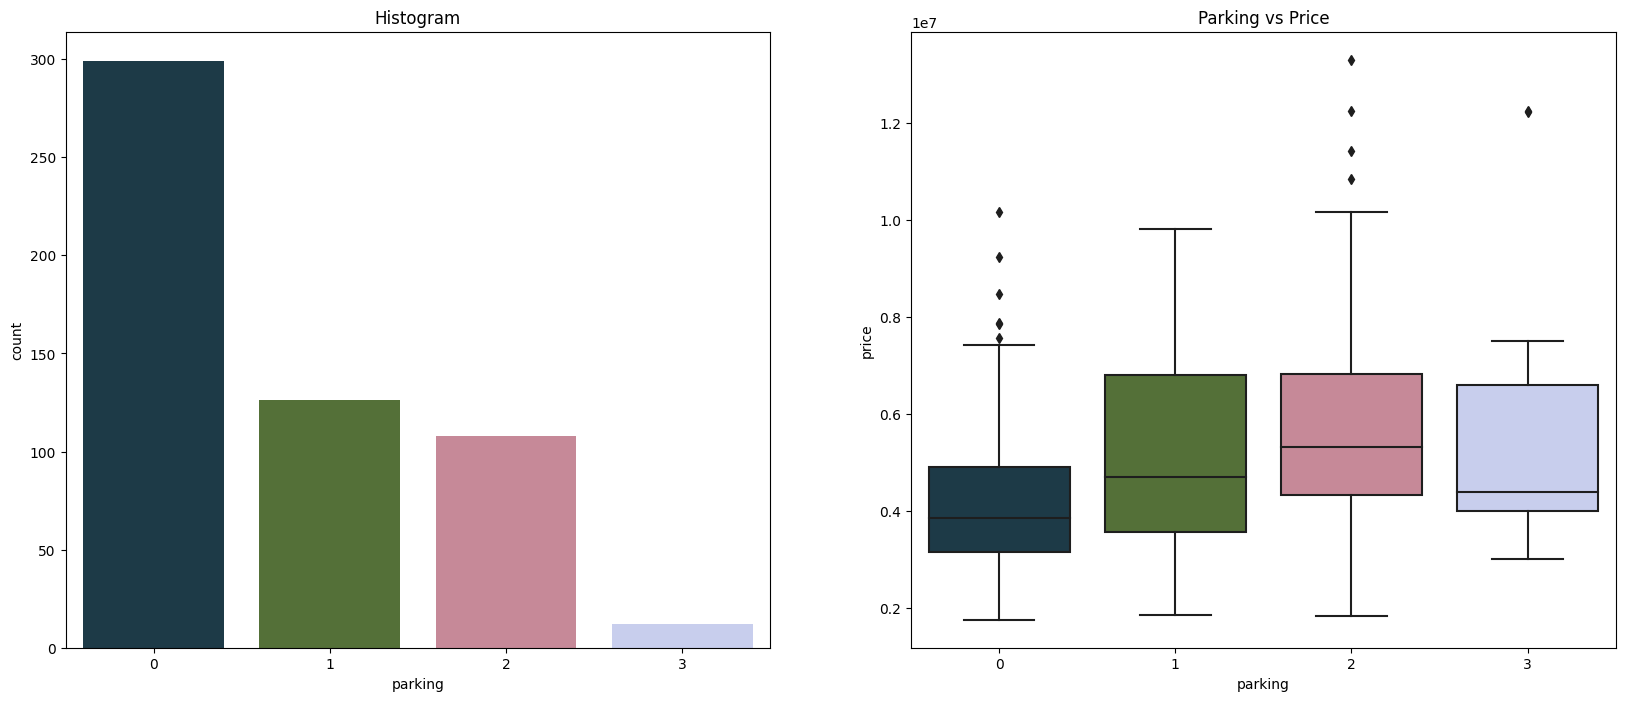

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='parking', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title("Parking vs Price")
sns.boxplot(data=df, x='parking', y='price', palette=("cubehelix"))

plt.show()

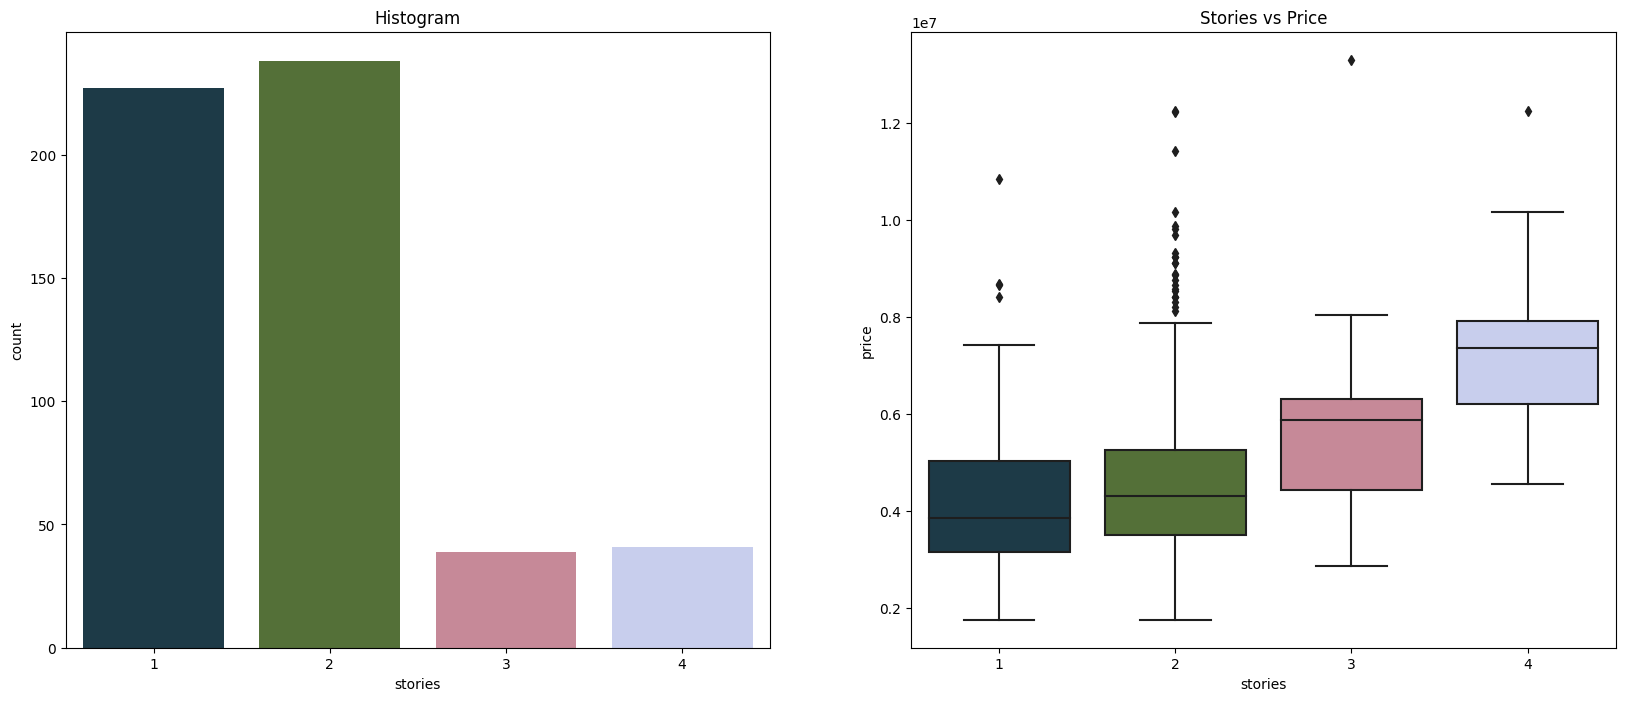

In [47]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='stories', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title("Stories vs Price")
sns.boxplot(data=df, x='stories', y='price', palette=("cubehelix"))

plt.show()

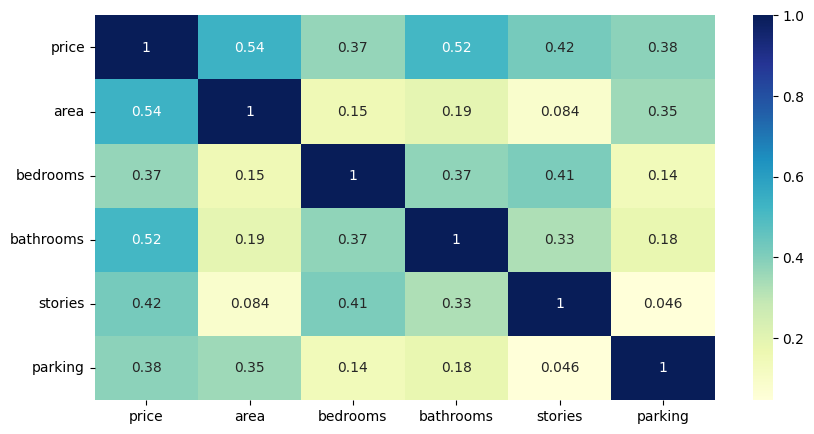

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(),annot=True, cmap="YlGnBu")
plt.show()

c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


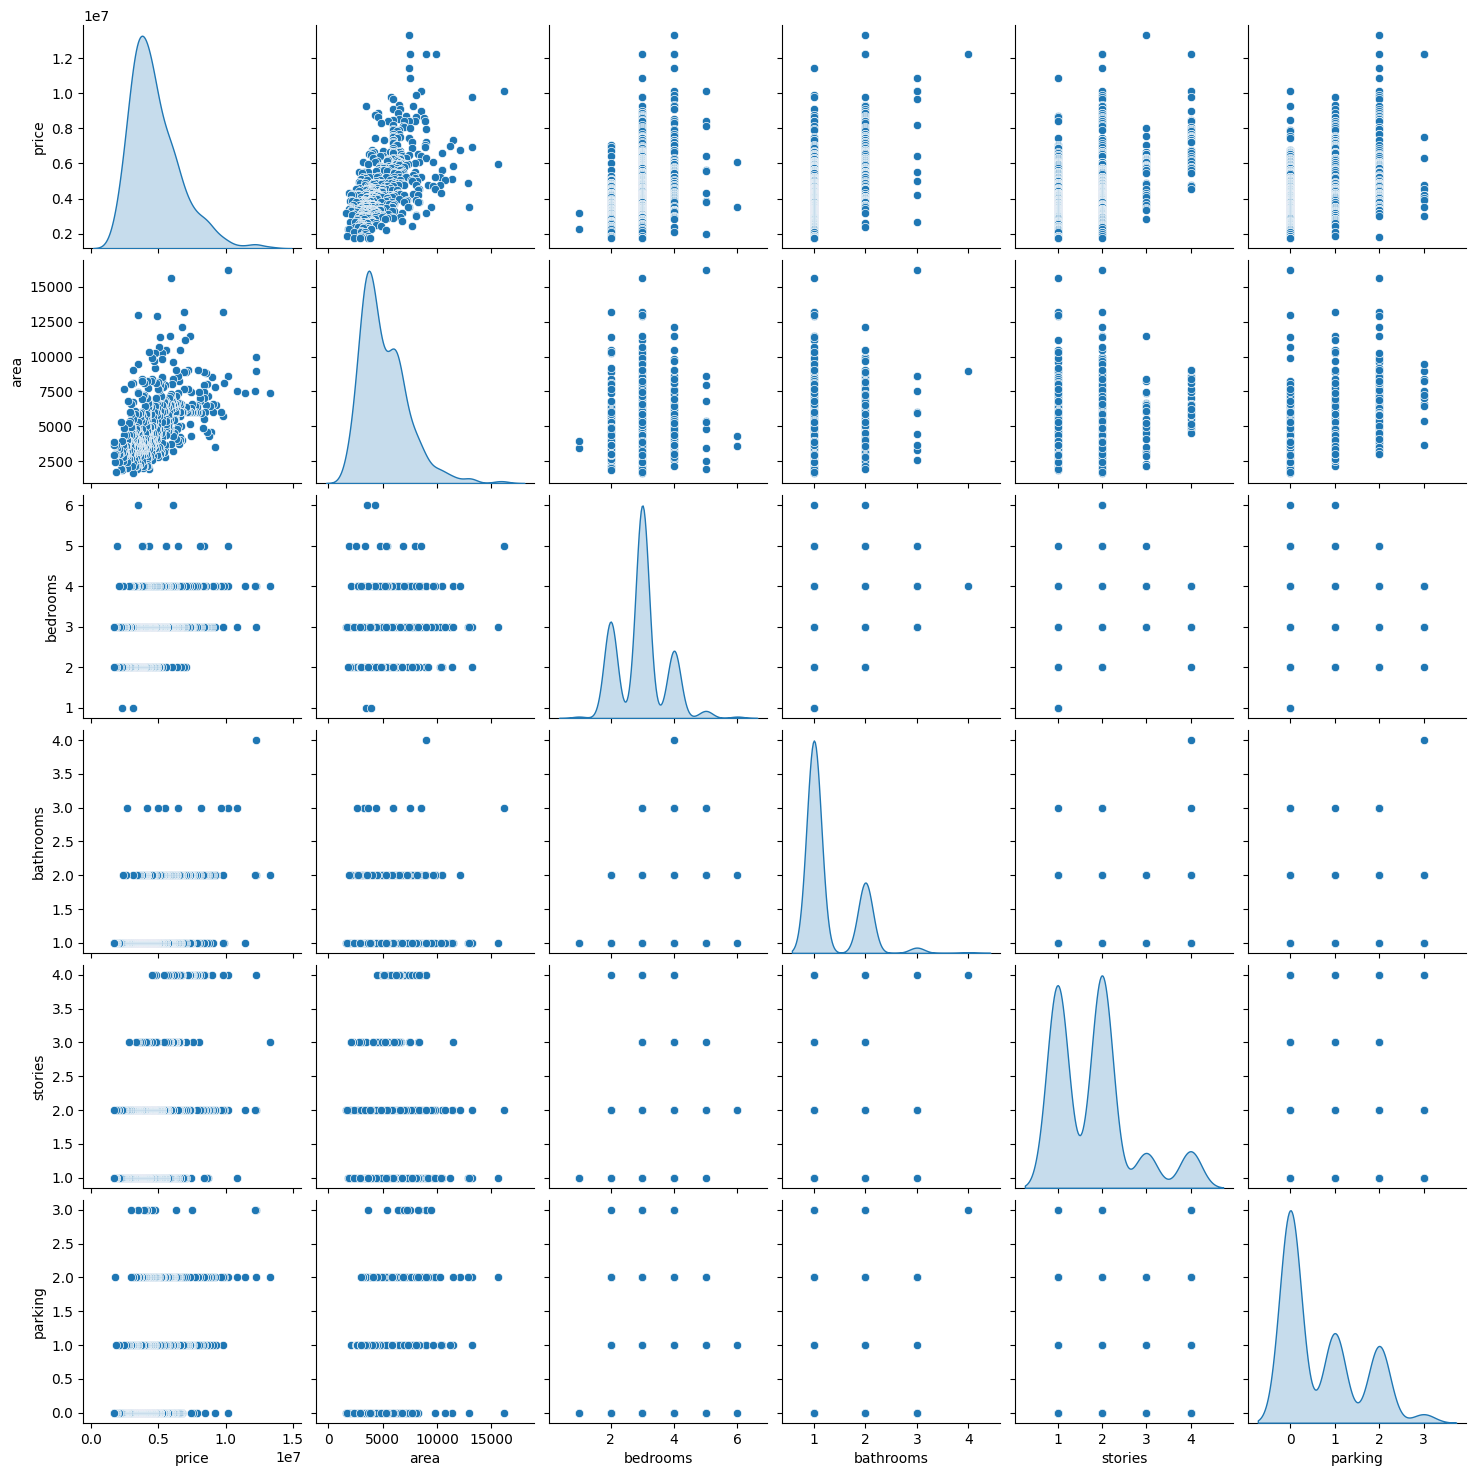

In [49]:
sns.pairplot(data=df_num,diag_kind='kde')
plt.show()

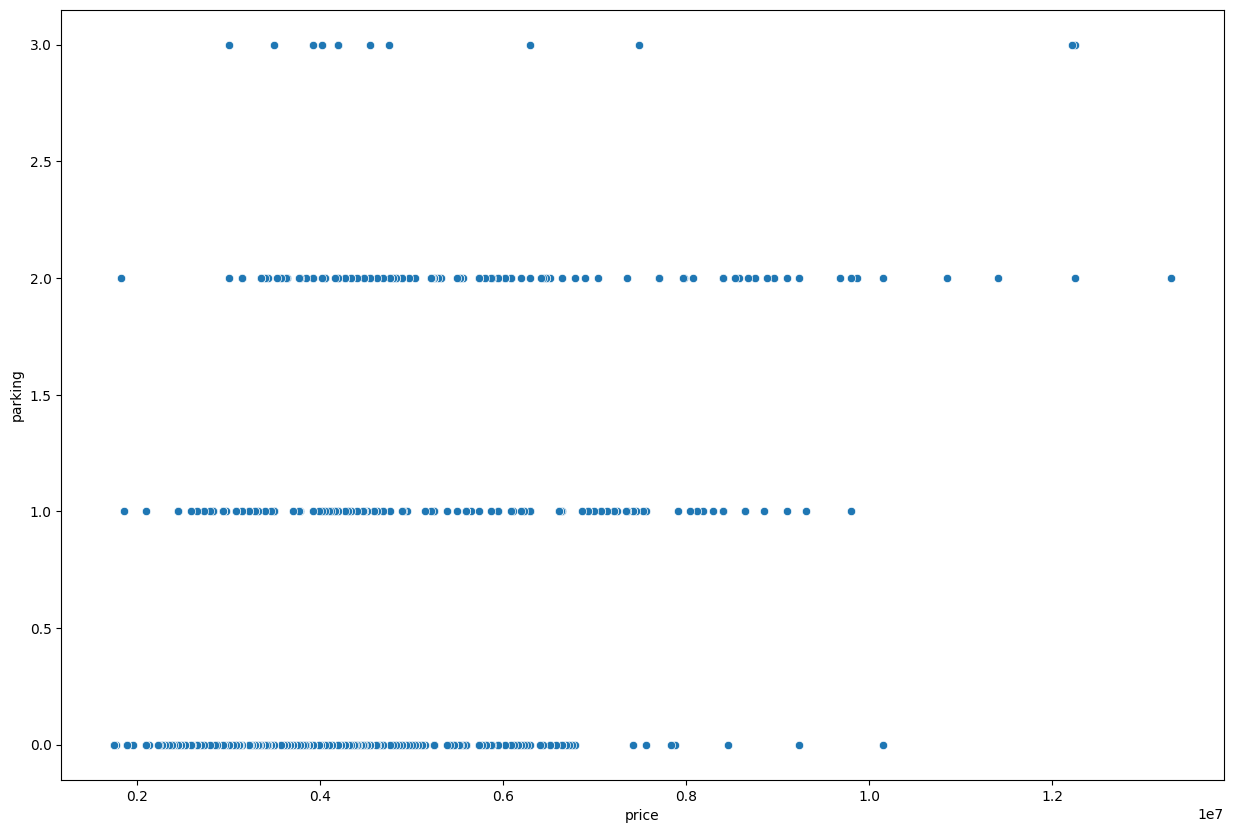

In [50]:
sns.scatterplot(data=df_num,x='price',y='parking')
plt.show()

Simple Linear Regression-(SLR)

In [51]:
df_cat.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [52]:
#unqiue values check
#df_cat.mainroad.value_counts()
df_cat.mainroad.unique()

array(['yes', 'no'], dtype=object)

ENCODING

n-1 ONE-HOT ENCODING

In [53]:
df_cat.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [54]:
df_cat_encoded=pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.replace([True,False],[1,0],inplace=True)
# or df_cat_encoded = df_cat_encoded.astype(int)
df_cat_encoded.head(10)

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0
5,1,0,1,0,1,1,1,0
6,1,0,0,0,1,1,1,0
7,1,0,0,0,0,0,0,1
8,1,1,1,0,1,1,0,0
9,1,1,0,0,1,1,0,1


In [55]:
df_ready=pd.concat([df_pt,df_cat_encoded],axis=1)
df_ready


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305,1,0,0,0,1,1,0,0
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159,1,0,0,0,1,0,0,0
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305,1,0,1,0,0,1,1,0
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159,1,0,1,0,1,1,0,0
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-2.530392,-1.167310,-1.392729,-0.599199,-1.103103,1.347305,1,0,1,0,0,0,0,1
541,-2.620103,-1.770055,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,1,0
542,-2.649870,-0.672559,-1.392729,-0.599199,-1.103103,-0.889526,1,0,0,0,0,0,0,1
543,-2.649870,-1.248611,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,0,0


In [56]:
df_ready.columns.size

14

Dropping the target variable

In [57]:
X=df_ready.drop('price',axis=1)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.115457,1.354134,1.661186,1.330576,1.347305,1,0,0,0,1,1,0,0
1,1.559601,1.354134,1.767283,1.814641,1.614159,1,0,0,0,1,0,0,0
2,1.804291,0.123303,1.661186,0.521478,1.347305,1,0,1,0,0,1,1,0
3,1.140991,1.354134,1.661186,0.521478,1.614159,1,0,1,0,1,1,0,0
4,1.115457,1.354134,-0.599199,0.521478,1.347305,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.167310,-1.392729,-0.599199,-1.103103,1.347305,1,0,1,0,0,0,0,1
541,-1.770055,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,1,0
542,-0.672559,-1.392729,-0.599199,-1.103103,-0.889526,1,0,0,0,0,0,0,1
543,-1.248611,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,0,0


In [58]:
print(len(X))
#df_ready.shape[0]

545


MODEL BUILDING-

In [59]:
#dependent variable Y
y=df_ready.price
#adds the intercept to the model
X=sm.add_constant(X)

In [84]:
#splitting of dataset
#RANDOM TATE TO GENERATE SAME DATASET EACH TIME THE CODE RUNS
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
x_train.head()




,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,1.0,1.030285,0.123303,-0.599199,-1.103103,1.347305,1,0,1,0,0,1,0,1
363,1.0,-0.698593,-1.392729,-0.599199,-1.103103,-0.889526,1,0,0,1,0,0,1,0
370,1.0,-0.241047,-1.392729,-0.599199,-1.103103,1.347305,1,0,0,0,1,0,1,0
31,1.0,0.976125,0.123303,-0.599199,1.814641,1.347305,1,0,0,0,1,0,1,0
113,1.0,1.724320,0.123303,-0.599199,-1.103103,1.347305,1,0,1,0,0,1,0,0


In [61]:
print('X TRAIN',x_train.shape)
print('X TEST',x_test.shape)
print('y TRAIN',y_train.shape)
print('y Test',y_test.shape)



X TRAIN (381, 14)
X TEST (164, 14)
y TRAIN (381,)
y Test (164,)


In [62]:
len(X),len(x_test),len(x_train)

(545, 164, 381)

In [63]:
#build a model on the train dataset
#fit() is used to fit an OLS MODEL (uses gradient descent to find the best fit line to find the weights)
MLS_model=sm.OLS(y_train,x_train).fit()
#PRINT THE SUMMARY OUTPUT
print(MLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.28
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.78e-89
Time:                        18:46:08   Log-Likelihood:                -283.19
No. Observations:                 381   AIC:                             594.4
Df Residuals:                     367   BIC:                             649.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [87]:
#predict values
y_pred=MLS_model.predict(x_test)
y_pred

316    0.386739
77     1.289152
360   -0.767932
90     0.120644
493   -0.697152
         ...   
395   -0.509878
425   -0.471397
195    0.751342
452    0.476116
154    0.207008
Length: 164, dtype: float64


In [65]:
np.sum((y_pred-y_test)*(y_pred-y_test))/len(y_test)

0.41786910243335046

In [66]:
mse(y_test,y_pred)

0.41786910243335046

In [67]:
rmse=np.sqrt(mse(y_test,y_pred))
rmse

0.6464279561044297

In [68]:
np.sum(np.abs((y_pred-y_test)))/len(y_test)


0.5069004491614885

In [69]:
mae(y_test,y_pred)

0.5069004491614885

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [71]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)


LinearRegression()

In [72]:
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)

c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
# Print Linear Regression predictions
print("Linear Regression Predictions:")
print(linear_reg_predictions)

Linear Regression Predictions:
[-0.77269219  1.45759833 -1.43650479 -0.12937186 -1.35855697 -1.56385974
  0.31965933  1.27602097 -2.53690324 -2.42237401  2.05900186 -2.12101875
 -2.09325598 -1.4569776  -1.18353431 -1.71884342 -1.85945057 -0.45991528
 -0.66622495 -1.08054041  0.10235889  1.47271009 -2.19091821 -0.07130966
  0.11628673  1.71122253 -1.45121951  0.05540993  2.21499436 -1.44312005
  1.47415706 -1.83897844  1.00163605 -0.66322616 -1.54860713  0.48698214
  0.14140656 -0.54727908 -2.07783776 -0.84876871 -0.53521402 -1.41482416
  1.44682109 -0.88255222 -0.97784936 -0.80906288  0.7591619  -0.74712465
 -1.48700289 -1.55765542  0.51107907 -2.20853792 -0.6710042  -0.32897595
 -1.20099743 -2.35012082  1.21450943 -2.26030709 -0.6220127  -2.15314962
 -0.31800405 -2.55331025  0.01015858 -0.5317471  -0.60102897  0.2909393
  1.28480053 -1.44695571 -0.60546154  1.55531534 -0.98764872  0.11490146
 -0.60500545  2.24593741 -1.53477481  0.77209192 -0.98227569  0.19021027
 -0.03567673 -1.00713

In [74]:
mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions)
print(f'Linear Regression Mean Squared Error: {mse_linear_reg}')

Linear Regression Mean Squared Error: 0.7009234802600158


In [75]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer with one neuron for regression
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [76]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions using the Neural Network model
nn_predictions = model.predict(X_test_scaled).flatten()

Epoch 1/50
12/12 [==============================] - 2s 4ms/step - loss: 1.1693
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.8379
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6379
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5151
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4357
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3802
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3418
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3153
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 11/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2667
Epoch 12/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2588
Epoch 13/50
12/12 [==============================

In [77]:
nn_predictions = model.predict(X_test_scaled).flatten()

6/6 [==============================] - 0s 2ms/step


In [86]:
# Print Neural Network predictions
print("\nNeural Network Predictions:")
print(nn_predictions)



Neural Network Predictions:
[ 0.25500882  1.447816   -0.6064358   0.01163934 -0.40800703 -0.7763915
  0.08847684  0.5798242  -1.0923152  -1.3704696   2.5865512  -1.2311667
 -1.1185158  -0.53912205 -0.74497086 -0.16532286 -0.6183648   0.15427773
 -0.0823614  -0.52474225  0.4555775   0.562548   -1.2772211   0.23728807
  0.40449965  1.8827236  -0.5408534   0.02279055  1.9984115  -0.7685537
  1.1663599  -0.97638917  0.89018124  0.02076449 -0.9866641   1.0531408
  0.1045052  -0.2235124  -1.1452019  -0.22326663  0.33999503 -1.23291
  1.4350466  -0.09383822 -0.43220168 -0.93165123  1.1088328   0.06864527
 -0.85323775 -0.4258048   1.3743922  -1.0991032  -0.05083953 -0.32040536
 -0.9455618  -1.2956707   1.3796127  -1.0140843  -0.05092211 -1.2522784
  0.10408334 -1.6925389   0.17420885 -0.22629522 -0.24363466  0.01398171
  0.9012148  -0.9354224   0.47215593  0.81120396 -0.16978703  0.48678368
 -0.02203849  1.990151   -1.2398671  -0.20938288 -0.08914813  0.3261218
 -0.12028636 -0.24543525  1.770

In [79]:
mse_nn = mean_squared_error(y_test, nn_predictions)
print(f'Neural Network Mean Squared Error: {mse_nn}')

Neural Network Mean Squared Error: 0.49222683393096883


In [109]:
# Assuming you want to predict the price for the first instance in the test set (you can change the index as per your choice)
user_input_features = x_test.iloc[0, :]




In [114]:
"""
Add a constant term (intercept) to the user input features
user_input_features_with_intercept = sm.add_constant(user_input_features)

# Reshape the input features to a 2D array with a single row
user_input_features_reshaped = user_input_features_with_intercept.values.reshape(1, -1)

# Make predictions using the linear regression model
linear_reg_user_prediction = MLS_model.predict(user_input_features_reshaped)
print("Linear Regression Prediction for User Input:")
print(linear_reg_user_prediction.iloc[0])
"""

'\nAdd a constant term (intercept) to the user input features\nuser_input_features_with_intercept = sm.add_constant(user_input_features)\n\n# Reshape the input features to a 2D array with a single row\nuser_input_features_reshaped = user_input_features_with_intercept.values.reshape(1, -1)\n\n# Make predictions using the linear regression model\nlinear_reg_user_prediction = MLS_model.predict(user_input_features_reshaped)\nprint("Linear Regression Prediction for User Input:")\nprint(linear_reg_user_prediction.iloc[0])\n'

In [115]:
"""
user_input_features_scaled = scaler.transform(user_input_features.values.reshape(1, -1))

# Make predictions using the neural network model
nn_user_prediction = model.predict(user_input_features_scaled).flatten()
print("\nNeural Network Prediction for User Input:")
print(nn_user_prediction[0])
"""


'\nuser_input_features_scaled = scaler.transform(user_input_features.values.reshape(1, -1))\n\n# Make predictions using the neural network model\nnn_user_prediction = model.predict(user_input_features_scaled).flatten()\nprint("\nNeural Network Prediction for User Input:")\nprint(nn_user_prediction[0])\n'

In [112]:
"""
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200)
rfr.fit(x_train,y_train)
y_p=rfr.predict(x_test)
rfr_mse=mean_squared_error(y_test,y_p)
rfr_rmse=np.sqrt(rfr_mse)
rfr_rmse
"""

0.7011907355508531